In [3]:
library(tidyverse)   
library(readr)       
library(readxl)     
library(vegan)       
library(reshape2)  
library(dplyr)


# Get data

In [4]:
spe <- read.delim ('https://raw.githubusercontent.com/zdealveindy/anadat-r/master/data/MQU_spe.txt', row.names = 1)
env <- read.delim ('https://raw.githubusercontent.com/zdealveindy/anadat-r/master/data/MQU_env.txt', row.names = 1)
traits <- read.delim ('https://raw.githubusercontent.com/zdealveindy/anadat-r/master/data/MQU_traits.txt', row.names = 1)
loc <- read.delim ('https://raw.githubusercontent.com/zdealveindy/anadat-r/master/data/MQU_loc.txt')

In [5]:
head(spe)

,Acer.palmatum.var..pubescens,Acer.serrulatum,Ardisia.quinquegona,Barthea.barthei,Blastus.cochinchinensis,Camellia.brevistyla,Camellia.tenuifolia,Castanopsis.cuspidata.var..carlesii,Chamaecyparis.obtusa.var..formosana,Cinnamomum.kanehirae,⋯,Symplocos.wikstroemiifolia,Syzygium.buxifolium,Ternstroemia.gymnanthera,Tricalysia.dubia,Trochodendron.aralioides,Turpinia.formosana,Vaccinium.randaiense,Viburnum.foetidum.var..rectangulatum,Viburnum.integrifolium,Viburnum.taitoense
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
M01,0,0.00,4.94,0.00,9.49,0.00,0,4.16,0.00,0.00,⋯,0,0.00,0.00,0.42,0.00,0.00,0.0,0.00,0.00,0.00
M02,0,4.45,0.48,0.00,0.49,0.00,0,0.00,0.00,0.00,⋯,0,0.00,0.00,2.48,0.00,3.03,0.0,0.00,0.00,0.00
M03,0,0.00,0.18,0.00,21.31,0.00,0,0.92,0.00,5.06,⋯,0,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00
Q01,0,0.00,0.00,0.16,0.00,0.00,0,0.00,0.17,0.00,⋯,0,12.37,0.00,0.00,0.00,0.00,3.1,0.00,0.00,0.00
Q02,0,0.00,0.00,0.00,0.00,0.41,0,0.00,0.00,0.00,⋯,0,0.00,1.53,0.00,0.00,0.00,0.2,0.00,0.00,5.36
Q03,0,0.00,0.00,0.00,0.00,0.00,0,0.00,0.00,0.00,⋯,0,0.00,0.32,0.00,0.32,0.00,0.0,1.93,0.32,0.63


# Compute chord distance matrix (abundance)


In [6]:
# Compute matrix of euclidian distances of the normalized datas among sites
spe.norm <- decostand(spe, "normalize") # normalize datas
spe.ch <- vegdist(spe.norm, "euc") # calculate the chord distance matrix (euclidean distance of normalized species data)

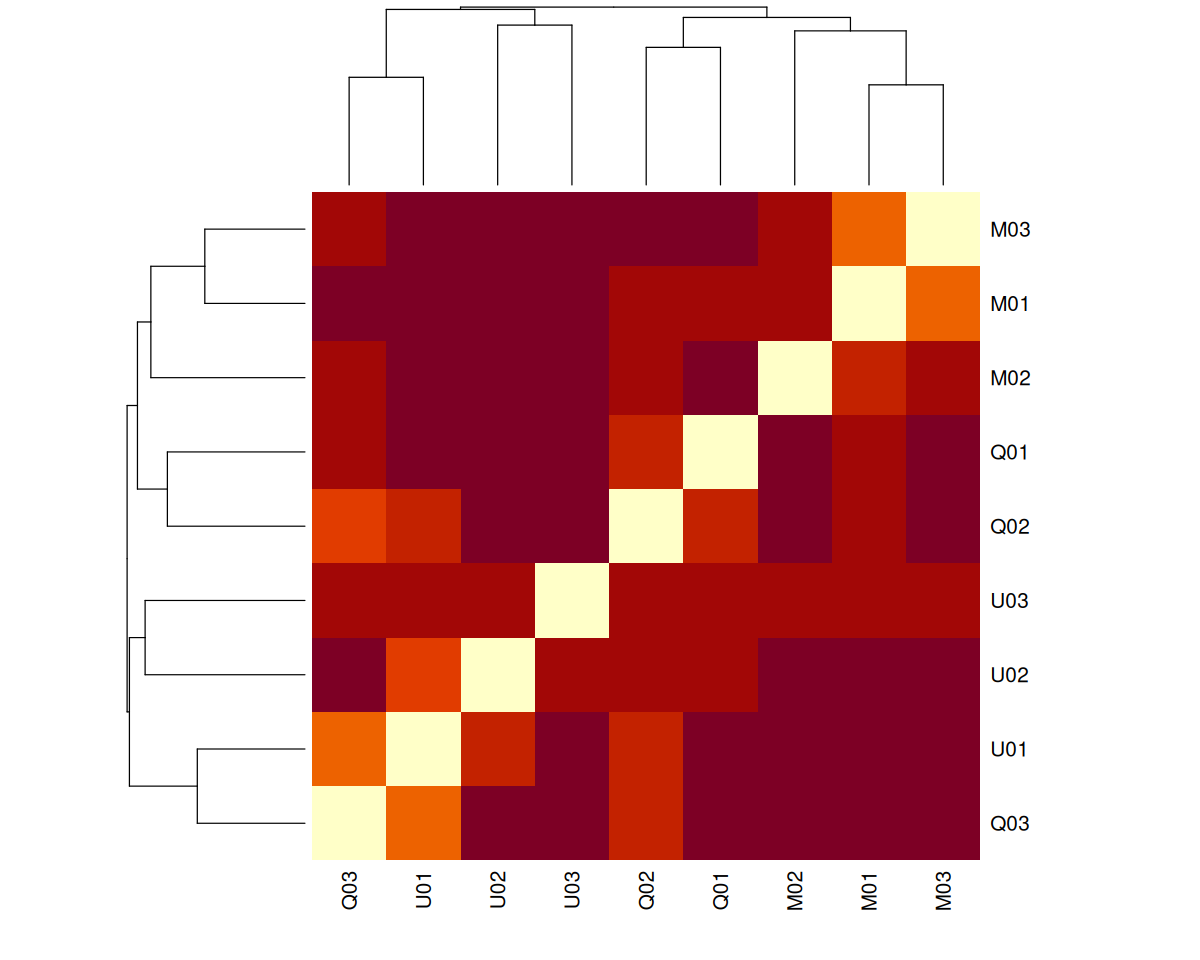

In [12]:
# Set plot size in Jupyter Notebook (10 x 8 inches)
options(repr.plot.width = 10, repr.plot.height = 8)
heatmap(as.matrix(spe.ch))

# Ward linkage

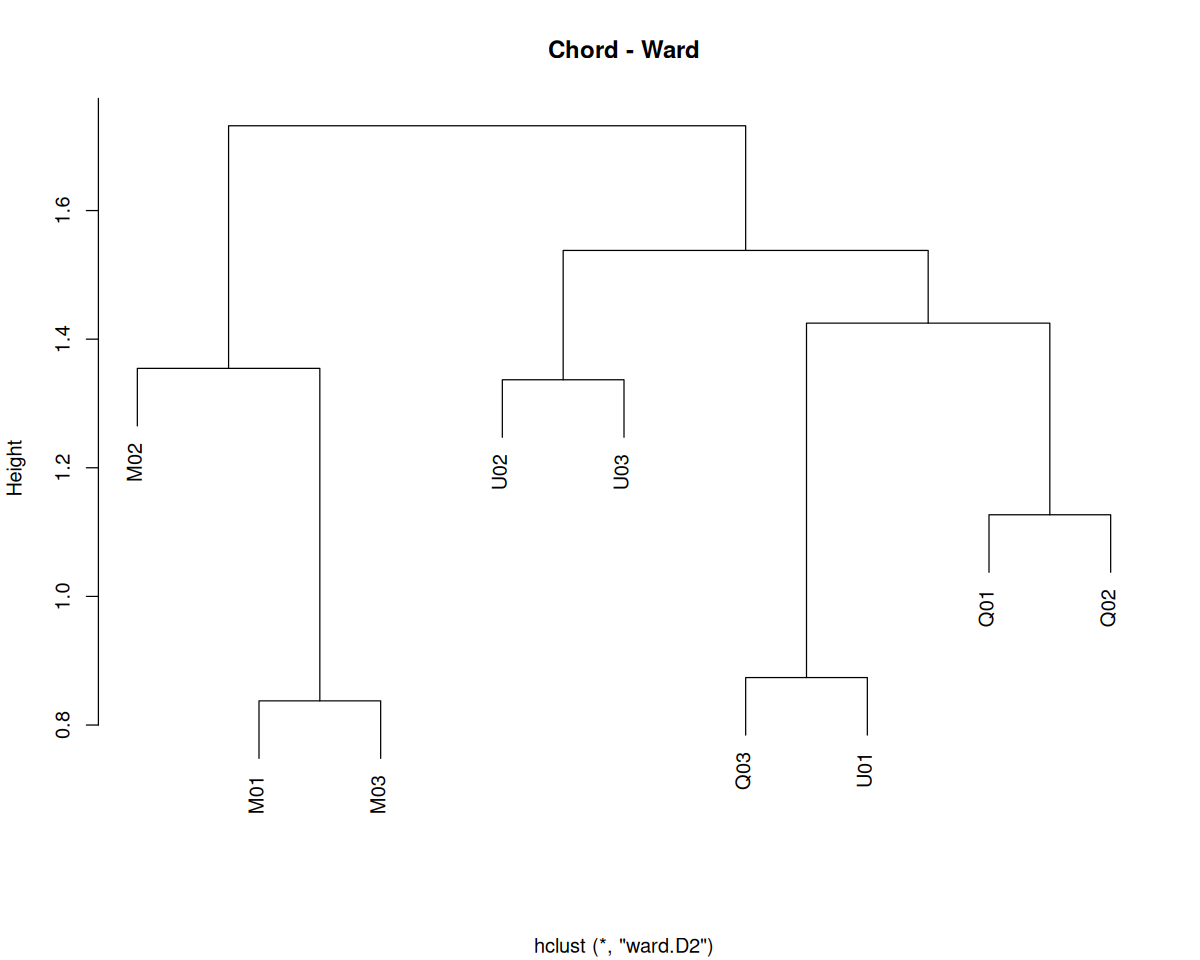

In [26]:
# Compute and plot Ward's minimum variance agglomerative clustering
spe.ch.ward <- hclust(spe.ch, method = "ward.D2")

# Set plot size in Jupyter Notebook (10 x 8 inches)
# Set plot size in Jupyter Notebook (10 x 8 inches)
options(repr.plot.width = 10, repr.plot.height = 8)

# Plot the dendrogram using default options
plot(spe.ch.ward,  main = "Chord - Ward", xlab="")

Cophonetic with Ward

In [27]:
# Compute the cophenetic distance matrix from the dendrogram obtained with Ward clustering
spe.ch.ward.coph <- cophenetic(spe.ch.ward)

# Compute the cophenetic correlation for Ward clustering
cor(spe.ch, spe.ch.ward.coph)

[1] 0.7870955

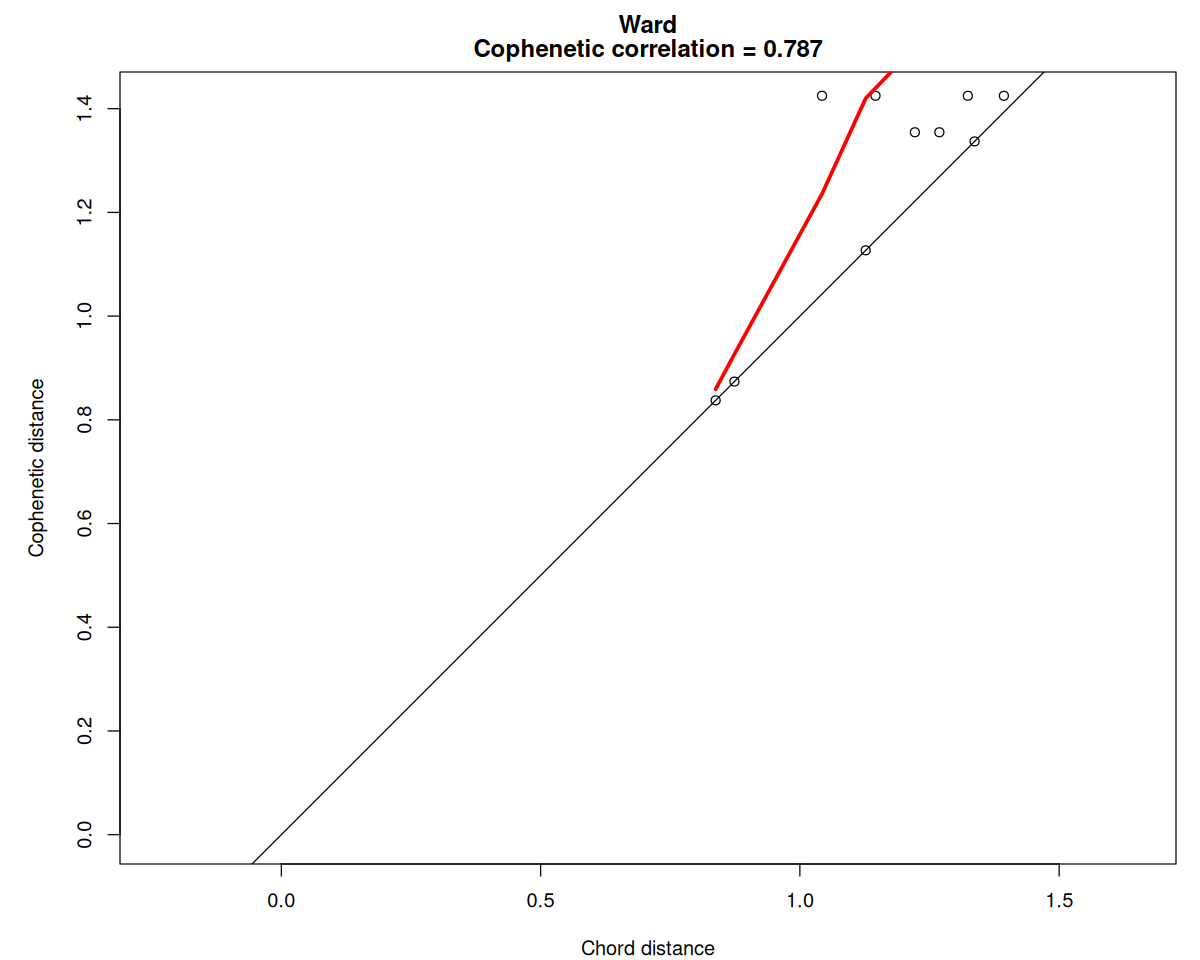

In [28]:
# Set plot size in Jupyter Notebook (10 x 8 inches)
options(repr.plot.width = 10, repr.plot.height = 8)

# Shepard diagram ---------------------------------------------------------
par(mfrow=c(1,1), mar=c(4,5,3,1))

plot(spe.ch, spe.ch.ward.coph, #initial chord distance against cophenetic distance from ward clustering
  xlab = "Chord distance",
  ylab = "Cophenetic distance",
  asp = 1, xlim = c(0, sqrt(2)),
  ylim = c(0, sqrt(2)),
  main = c("Ward", paste("Cophenetic correlation =", round(cor(spe.ch, spe.ch.ward.coph), 3))))
abline(0, 1)  # Add a 1:1 reference line (ideal match between distances)
lines(lowess(spe.ch, spe.ch.ward.coph), col = "red", lwd=3) # Add a LOWESS (locally weighted scatterplot smoothing) curve to visualize the trend

# Average clusters

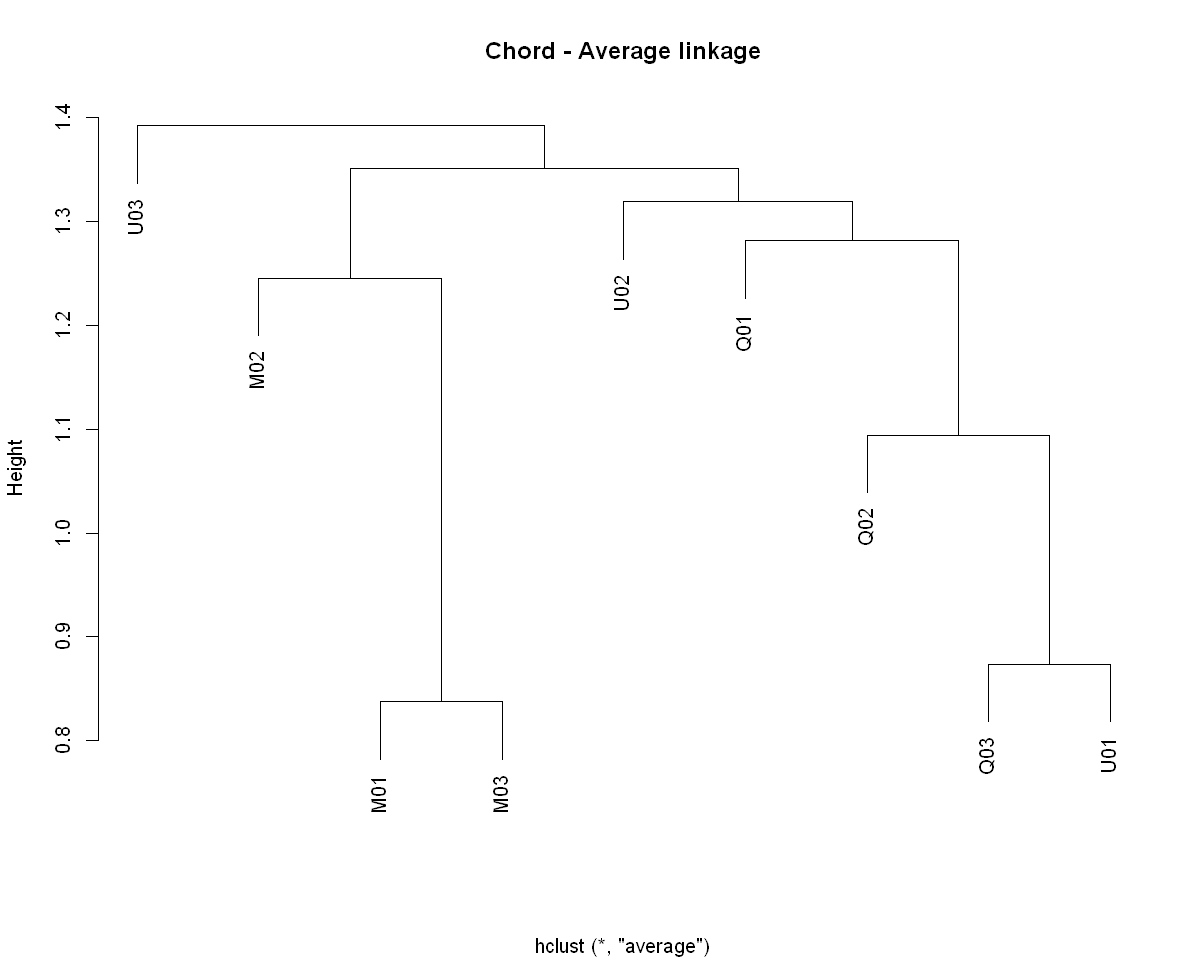

In [7]:
# Compute and plot Average linkage agglomerative clustering
spe.ch.average <- hclust(spe.ch, method = "average")

options(repr.plot.width = 10, repr.plot.height = 8)

# Plot the dendrogram using default options
plot(spe.ch.average,  main = "Chord - Average linkage", xlab="")

In [8]:
# Compute the cophenetic distance matrix from the dendrogram obtained with Average linkage clustering
spe.ch.average.coph <- cophenetic(spe.ch.average)

# Compute the cophenetic correlation for Average linkageclustering
cor(spe.ch, spe.ch.average.coph)

[1] 0.8986514

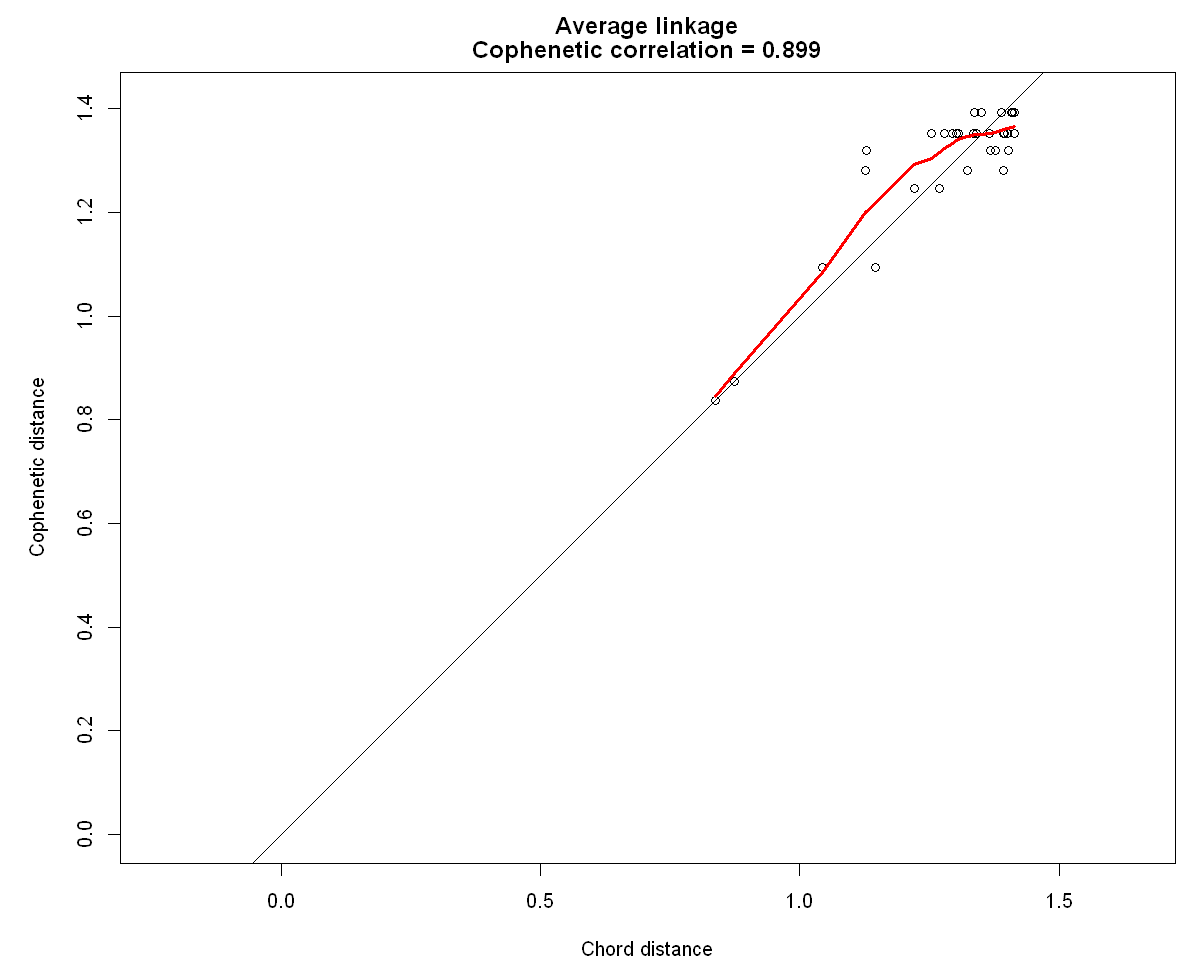

In [9]:
# Set plot size in Jupyter Notebook (10 x 8 inches)
options(repr.plot.width = 10, repr.plot.height = 8)

# Shepard diagram ---------------------------------------------------------
par(mfrow=c(1,1), mar=c(4,5,3,1))

plot(spe.ch, spe.ch.average.coph, #initial chord distance against cophenetic distance from Average linkage clustering
  xlab = "Chord distance",
  ylab = "Cophenetic distance",
  asp = 1, xlim = c(0, sqrt(2)),
  ylim = c(0, sqrt(2)),
  main = c("Average linkage", paste("Cophenetic correlation =", round(cor(spe.ch, spe.ch.average.coph), 3))))
abline(0, 1)  # Add a 1:1 reference line (ideal match between distances)
lines(lowess(spe.ch, spe.ch.average.coph), col = "red", lwd=3) # Add a LOWESS (locally weighted scatterplot smoothing) curve to visualize the trend

# Cut tree and add cluster to abundance table

In [12]:
clusters <- cutree(spe.ch.average, k = 3)
spe$cluster <- clusters

# Table d'abundance without cluster class
spe.abund <- spe[, !colnames(spe) %in% "cluster"]


In [13]:
spe

,Acer.palmatum.var..pubescens,Acer.serrulatum,Ardisia.quinquegona,Barthea.barthei,Blastus.cochinchinensis,Camellia.brevistyla,Camellia.tenuifolia,Castanopsis.cuspidata.var..carlesii,Chamaecyparis.obtusa.var..formosana,Cinnamomum.kanehirae,⋯,Syzygium.buxifolium,Ternstroemia.gymnanthera,Tricalysia.dubia,Trochodendron.aralioides,Turpinia.formosana,Vaccinium.randaiense,Viburnum.foetidum.var..rectangulatum,Viburnum.integrifolium,Viburnum.taitoense,cluster
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
M01,0.00,0.00,4.94,0.00,9.49,0.00,0.00,4.16,0.00,0.00,⋯,0.00,0.00,0.42,0.00,0.00,0.0,0.00,0.00,0.00,1
M02,0.00,4.45,0.48,0.00,0.49,0.00,0.00,0.00,0.00,0.00,⋯,0.00,0.00,2.48,0.00,3.03,0.0,0.00,0.00,0.00,1
M03,0.00,0.00,0.18,0.00,21.31,0.00,0.00,0.92,0.00,5.06,⋯,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,1
Q01,0.00,0.00,0.00,0.16,0.00,0.00,0.00,0.00,0.17,0.00,⋯,12.37,0.00,0.00,0.00,0.00,3.1,0.00,0.00,0.00,2
Q02,0.00,0.00,0.00,0.00,0.00,0.41,0.00,0.00,0.00,0.00,⋯,0.00,1.53,0.00,0.00,0.00,0.2,0.00,0.00,5.36,2
Q03,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,⋯,0.00,0.32,0.00,0.32,0.00,0.0,1.93,0.32,0.63,2
U01,3.31,0.00,0.00,0.00,0.00,0.00,3.25,12.43,0.00,0.00,⋯,0.00,1.59,0.00,4.01,0.00,0.0,1.30,0.00,0.00,2
U02,0.00,0.00,0.00,0.00,0.00,0.00,2.32,0.00,2.21,0.00,⋯,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,2
U03,0.00,0.00,0.00,6.83,0.00,0.00,0.00,0.00,45.63,0.00,⋯,0.00,0.36,0.00,2.28,0.00,0.0,1.18,0.00,0.00,3


# CWM

In [20]:
devtools::install_github ('zdealveindy/weimea')


Please download and install Rtools 4.4 from https://cran.r-project.org/bin/windows/Rtools/.

Using github PAT from envvar GITHUB_PAT. Use `gitcreds::gitcreds_set()` and unset GITHUB_PAT in .Renviron (or elsewhere) if you want to use the more secure git credential store instead.



Please download and install the appropriate version of Rtools for 4.4.2 from
https://cran.r-project.org/bin/windows/Rtools/.



ERROR: Error: Failed to install 'weimea' from GitHub:
  Could not find tools necessary to compile a package
Call `pkgbuild::check_build_tools(debug = TRUE)` to diagnose the problem.


In [14]:
# Nettoyage des noms d'espèces
clean_names <- function(x) {
  x <- gsub(" ", ".", x)
  x <- gsub("\\.\\.+", ".", x)
  x <- tolower(x)
  x
}


colnames(spe.abund) <- clean_names(colnames(spe.abund))
rownames(traits)    <- clean_names(rownames(traits))


In [15]:
library (weimea)
CWM <- cwm (com = spe.abund , traits = traits)
rownames(CWM) <- rownames(spe)
CWM

ERROR: Error in library(weimea): there is no package called 'weimea'


In [49]:
all(colnames(spe.abund) == rownames(traits))


[1] TRUE

# PCoA

In [69]:
clusters <- cutree(spe.ch.average, k = 3)
clusters <- clusters[rownames(CWM)]


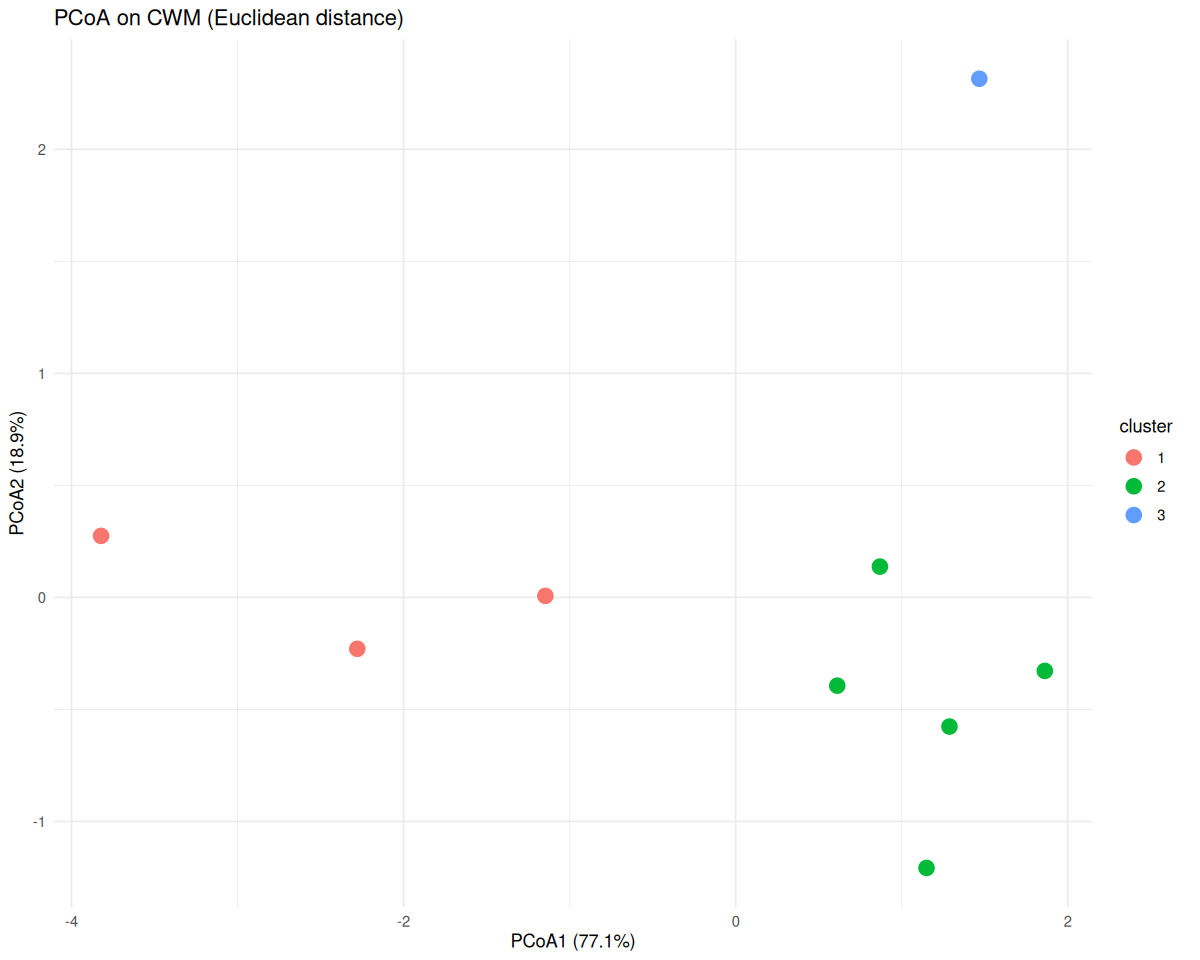

In [71]:
# 1. Standardize CWM
CWM.scaled <- scale(CWM)

# 2. Distance
CWM.dist <- dist(CWM.scaled, method = "euclidean")

# 3. PCoA
pcoa <- cmdscale(CWM.dist, eig = TRUE, k = 2)

# 4. Variance explained
var_expl <- pcoa$eig / sum(pcoa$eig)


# Data frame for plotting
pcoa_sites <- data.frame(
  site    = rownames(CWM),
  PCoA1   = pcoa$points[, 1],
  PCoA2   = pcoa$points[, 2],
  cluster = factor(clusters)
)


# Scatter plot 
ggplot(pcoa_sites, aes(x = PCoA1, y = PCoA2, color = cluster)) +
  geom_point(size = 4) +
  xlab(paste0("PCoA1 (", round(var_expl[1] * 100, 1), "%)")) +
  ylab(paste0("PCoA2 (", round(var_expl[2] * 100, 1), "%)")) +
  ggtitle("PCoA on CWM (Euclidean distance)") +
  theme_minimal()


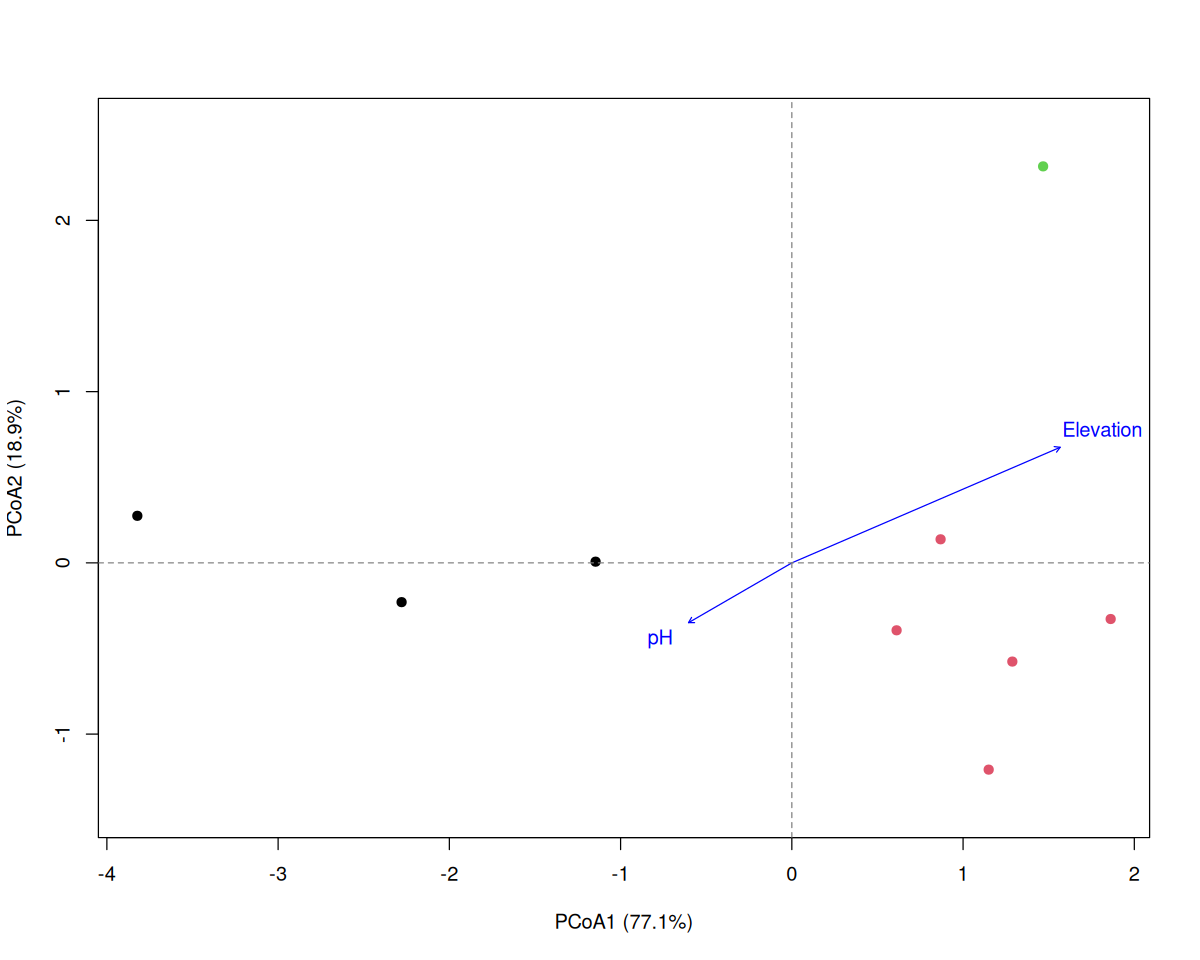

In [72]:
ef <- envfit(pcoa$points, env, permutations = 999)

plot(
  pcoa$points,
  col = as.numeric(pcoa_sites$cluster),
  pch = 19,
  asp = 1,
  xlab = paste0("PCoA1 (", round(var_expl[1] * 100, 1), "%)"),
  ylab = paste0("PCoA2 (", round(var_expl[2] * 100, 1), "%)")
)

plot(ef, add = TRUE, col = "blue")
abline(h = 0, v = 0, lty = 2, col = "grey50")


ERROR: Error in fix.by(by.y, y): 'by' must specify a uniquely valid column
